In [42]:
# -*- coding: utf-8 -*-
"""lda-himank.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/12zx-jsZowxlpoN5yMB7CbRrZWVJVBfMu
"""

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import os
from pathlib import Path
import json
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
import csv
import random
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import spacy
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import json

import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
with open('sampled_tr_docs_10k_all.json', 'r') as outfile:  
    train_docs = json.load(outfile)

In [ ]:
trustworthy = []
untrustworthy = []
for doc in train_docs:
    if doc[3] in ["reliable","political"]:
        trustworthy.append(doc)
    else:
        untrustworthy.append(doc)

In [ ]:
trustworthy = [doc[5] for doc in trustworthy]
untrustworthy = [doc[5] for doc in untrustworthy]
not_shuffled = trustworthy+untrustworthy

In [ ]:
not_shuffled[69999]

In [ ]:
def write(name, data):
    with open('{}.json'.format(name), 'w') as outfile:
        json.dump(data, outfile)

In [ ]:
write("sampled_tr_docs_10k_trustworthy", trustworthy)
write("sampled_tr_docs_10k_untrustworthy", untrustworthy)
write("sampled_tr_docs_10k_not_shuffled", not_shuffled)

In [2]:
with open('stats.txt', 'r') as outfile:
    lines = outfile.readlines()

In [3]:
lines[:5]

['max tokens: 9293\n',
 'total tokens: 24576963\n',
 '<10> LL/token: -11.05596\n',
 '<20> LL/token: -9.9188\n',
 '<30> LL/token: -9.6716\n']

In [4]:
beta = [float(line.split(" ")[1][:-1]) if "beta" in line else 0 for line in lines]
beta = list(filter(lambda a: a != 0, beta))

In [5]:
ll = [float(line.strip().split(" ")[2]) if "LL/token" in line else 0 for line in lines]
ll = list(filter(lambda a: a != 0, ll))
len(ll)

500

In [6]:
beta

[0.00763,
 0.00738,
 0.00708,
 0.00673,
 0.00637,
 0.00604,
 0.00574,
 0.00548,
 0.00526,
 0.00507,
 0.00491,
 0.00478,
 0.00467,
 0.00458,
 0.0045,
 0.00444,
 0.00438,
 0.00433,
 0.00428,
 0.00424,
 0.00421,
 0.00417,
 0.00415,
 0.00412,
 0.00411,
 0.00408,
 0.00407,
 0.00404,
 0.00403,
 0.00402,
 0.004,
 0.00399,
 0.00398,
 0.00397,
 0.00396,
 0.00395,
 0.00394,
 0.00394,
 0.00393,
 0.00392,
 0.00392,
 0.00391,
 0.00391,
 0.0039,
 0.0039,
 0.00389,
 0.00389,
 0.00389,
 0.00388,
 0.00388,
 0.00388,
 0.00387,
 0.00387,
 0.00387,
 0.00386,
 0.00386,
 0.00386,
 0.00386,
 0.00385,
 0.00385,
 0.00385,
 0.00385,
 0.00385,
 0.00384,
 0.00384,
 0.00384,
 0.00384,
 0.00384,
 0.00384,
 0.00384,
 0.00384,
 0.00384,
 0.00383,
 0.00383,
 0.00383,
 0.00383,
 0.00383,
 0.00382,
 0.00382,
 0.00382,
 0.00383,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00382,
 0.00381,
 0.00381,
 0.00381,
 0.00381,
 0.00381,
 0.00381,
 0.00

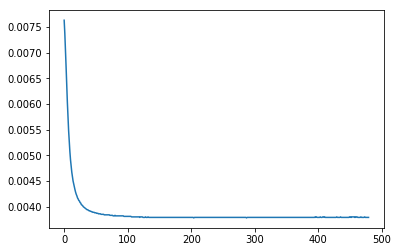

In [9]:
import matplotlib.pyplot as plt
plt.plot(beta)
plt.show()

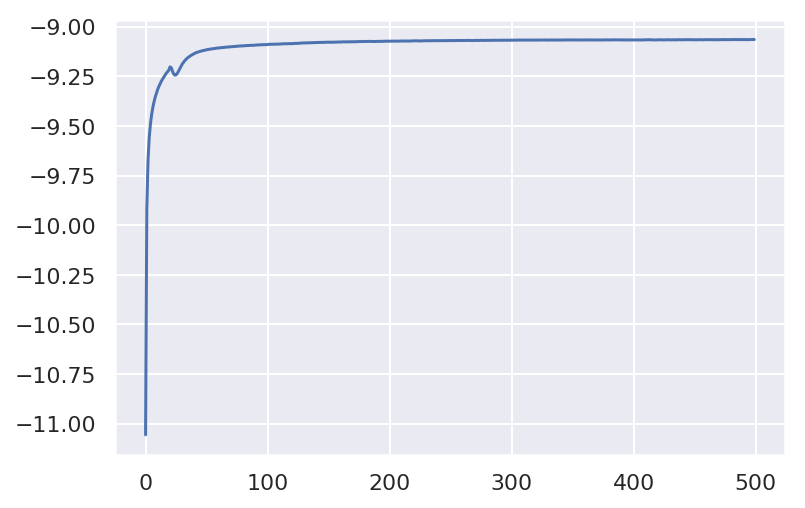

In [45]:
plt.plot(ll)
plt.show()

In [34]:
beta_x = [i for i in range(5000)][::10][1:481]
ll_x = [i for i in range(5010)][::10][1:]
pd_ll = pd.DataFrame({"iteration":ll_x, "LL/Token":ll})
pd_beta = pd.DataFrame({"iteration":beta_x, "beta":beta})

Text(0.5, 1.0, 'Average Log Likelihood per Token vs iterations')

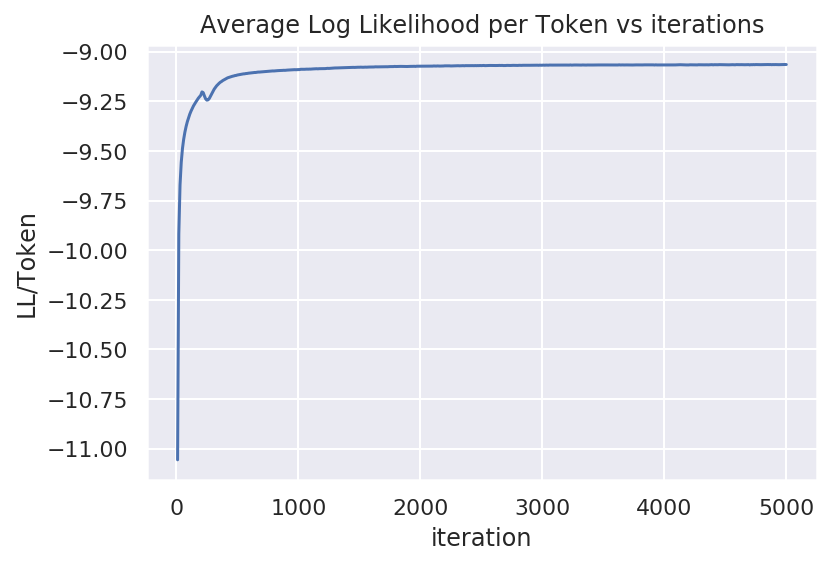

In [43]:
sns.set(style='darkgrid')
sns.timeseries
sns.lineplot(x='iteration', y='LL/Token', data=pd_ll).set_title("Average Log Likelihood per Token vs iterations")

Text(0.5, 1.0, 'beta value vs iterations')

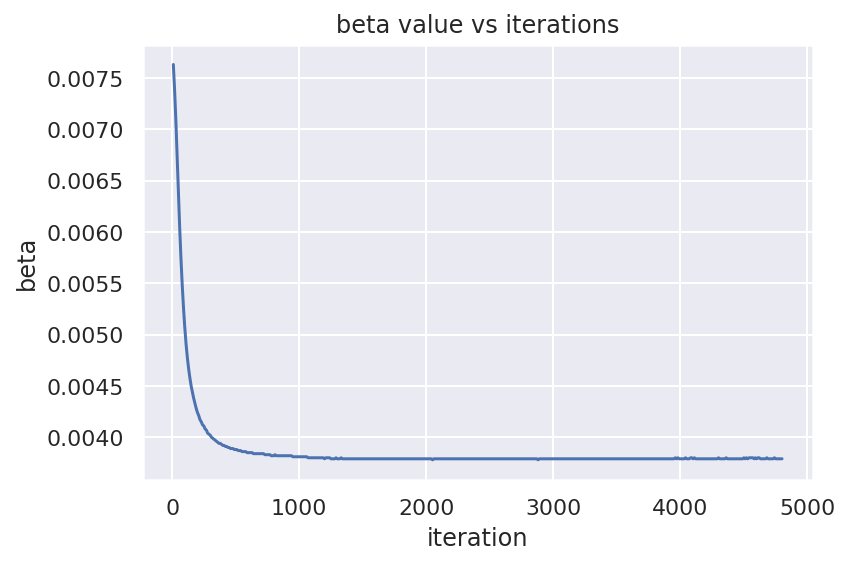

In [48]:
sns.lineplot(x='iteration', y='beta', data=pd_beta).set_title('beta value vs iterations')